# OpenHazus Demonstration (Input Processing)
S Tse  
8/18/2019  

This notebook explores whether the Hack Oregon Disaster Resilience Team can work with the inputs to the ShakeCast AEBM model. In this notebook I demonstrate that we can open the Tillimook building, and ShakeMap shapefiles using the GeoPandas package, explore the data, then perform the GIS intersects to feed the necessary inputs of PGA, PGV, SA03, and SA10 into the AEBM python package.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [2]:
# load Tillimoook structures data
structures_df = gpd.read_file("..\\data\\raw\\Tillamook_Building_Input\\Tillamook_Building_Input.shp")

In [3]:
structures_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27371 entries, 0 to 27370
Data columns (total 18 columns):
UserDefine    27371 non-null object
Occupancy     27371 non-null object
Tract         27371 non-null object
YearBuilt     27371 non-null int64
Cost          27371 non-null float64
NumStories    27371 non-null int64
Area          27371 non-null float64
ContentCos    27371 non-null float64
Latitude      27371 non-null float64
Longitude     27371 non-null float64
eqBldgType    27371 non-null object
DesignLeve    27371 non-null object
Foundation    27371 non-null object
SoilType      27371 non-null object
LqfSusCat     27371 non-null int64
LndSusCat     27371 non-null int64
WaterDepth    27371 non-null float64
geometry      27371 non-null object
dtypes: float64(6), int64(4), object(8)
memory usage: 3.8+ MB


In [4]:
structures_df.head()

,UserDefine,Occupancy,Tract,YearBuilt,Cost,NumStories,Area,ContentCos,Latitude,Longitude,eqBldgType,DesignLeve,Foundation,SoilType,LqfSusCat,LndSusCat,WaterDepth,geometry
0,OR001008,RES1,41057960100,2007,96600.0,2,1098.0,48300.0,45.695665,-123.809382,W1,HC,5,D,3,1,0.0,POINT (-123.809382 45.69566500000008)
1,OR001009,AGR1,41057960100,1969,22640.0,1,1440.0,22600.0,45.694994,-123.818328,S3,PC,7,C,0,7,0.0,POINT (-123.818328 45.69499400000007)
2,OR001010,RES1,41057960100,1995,129056.0,1,2220.0,64500.0,45.689002,-123.818460,W1,MC,5,D,3,1,0.0,POINT (-123.81846 45.68900200000007)
3,OR001011,RES1,41057960100,1980,60459.0,1,1040.0,30200.0,45.689002,-123.818460,W1,LC,5,D,3,1,0.0,POINT (-123.81846 45.68900200000007)
4,OR001012,AGR1,41057960100,1980,33485.0,1,576.0,33400.0,45.689002,-123.818460,S3,LC,7,D,3,1,0.0,POINT (-123.81846 45.68900200000007)


In [5]:
# check spatial projection of building shapes
structures_df.crs

{'init': 'epsg:4326'}

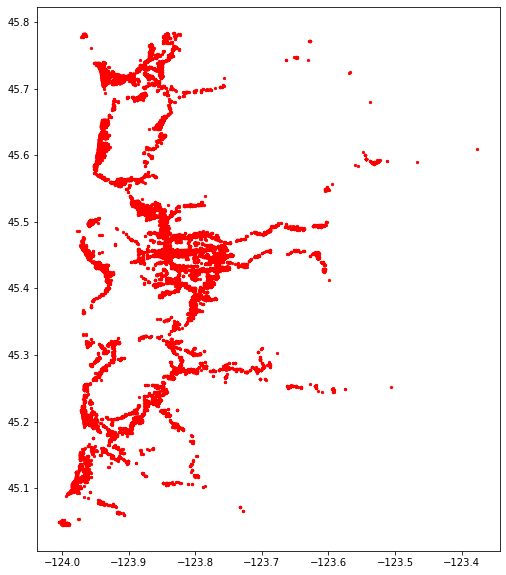

In [6]:
#base = world.plot(color='white', edgecolor='black')
ax = structures_df.plot(figsize=(10, 10),marker='o', color='red', markersize=5)
#ctx.add_basemap(ax)

In [7]:
# load data from pga shapfile
pga_df = gpd.read_file("..\\data\\raw\\Shakemap_Shapes\\pga.shp")

In [8]:
pga_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 7 columns):
AREA          3765 non-null float64
PERIMETER     3765 non-null float64
PGAPOL_       3765 non-null int64
PGAPOL_ID     3765 non-null int64
GRID_CODE     3765 non-null int64
PARAMVALUE    3765 non-null float64
geometry      3765 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 206.0+ KB


In [9]:
pga_df.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,2,1,2,0.02,"POLYGON ((-118.0588679244328 48.7, -118.059189..."
1,0.0,0.0,3,2,2,0.02,"POLYGON ((-118.0195833321174 48.7, -118.019565..."
2,0.0,0.0,4,3,2,0.02,"POLYGON ((-118.0199036354327 48.44, -118.01990..."
3,0.0,0.0,5,4,2,0.02,"POLYGON ((-118.0397727265935 46.94, -118.03984..."
4,0.0,0.0,6,5,2,0.02,POLYGON ((-118.0795505614516 46.73999999999999...


In [10]:
pga_df.crs

{'init': 'epsg:4326'}

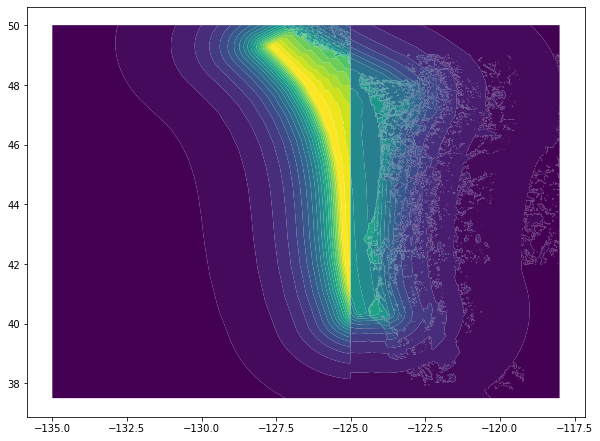

In [11]:
#plot of pga polygons colored by pga value
pga_df.plot(column='PARAMVALUE',figsize=(10, 10))

(45.0, 47.0)

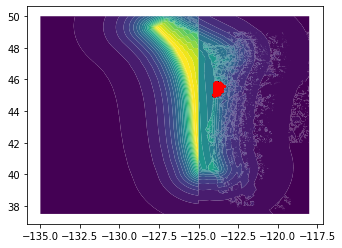

In [12]:
# with Tillimook building points overlayed over pga polygons
base = pga_df.plot(column='PARAMVALUE')
structures_df.plot(ax=base,marker='o', color='red', markersize=5)
ax.set_xlim([-124.1, -123.5])
ax.set_ylim([45.0, 47.0])

(45.0, 46.0)

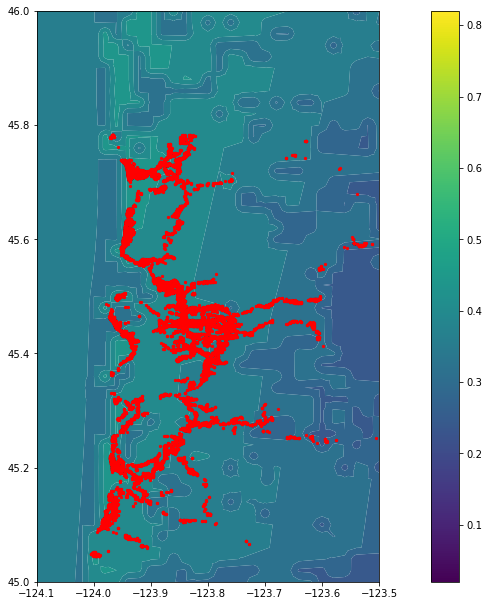

In [13]:
# zoomed in to area around Tillimook county
fig, ax = plt.subplots()
ax.set_aspect('equal')
fig.set_size_inches(18.5, 10.5)
pga_df.plot(ax=ax,column='PARAMVALUE',legend=True)
structures_df.plot(ax=ax,marker='o', color='red', markersize=5)
ax.set_xlim([-124.1, -123.5])
ax.set_ylim([45.0, 46.0])

In [14]:
# test using geopandas.sjoin to perform a spatial join and determine which building footprints are contained within which PGA polygon

building_pga = gpd.sjoin(structures_df, pga_df, how="inner", op="intersects")

In [15]:
building_pga.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27371 entries, 0 to 27360
Data columns (total 25 columns):
UserDefine     27371 non-null object
Occupancy      27371 non-null object
Tract          27371 non-null object
YearBuilt      27371 non-null int64
Cost           27371 non-null float64
NumStories     27371 non-null int64
Area           27371 non-null float64
ContentCos     27371 non-null float64
Latitude       27371 non-null float64
Longitude      27371 non-null float64
eqBldgType     27371 non-null object
DesignLeve     27371 non-null object
Foundation     27371 non-null object
SoilType       27371 non-null object
LqfSusCat      27371 non-null int64
LndSusCat      27371 non-null int64
WaterDepth     27371 non-null float64
geometry       27371 non-null object
index_right    27371 non-null int64
AREA           27371 non-null float64
PERIMETER      27371 non-null float64
PGAPOL_        27371 non-null int64
PGAPOL_ID      27371 non-null int64
GRID_CODE      27371 non-null i

In [16]:
building_pga.head()

,UserDefine,Occupancy,Tract,YearBuilt,Cost,NumStories,Area,ContentCos,Latitude,Longitude,...,LndSusCat,WaterDepth,geometry,index_right,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE
0,OR001008,RES1,41057960100,2007,96600.0,2,1098.0,48300.0,45.695665,-123.809382,...,1,0.0,POINT (-123.809382 45.69566500000008),3170,0.0,0.0,3172,3171,40,0.4
1,OR001009,AGR1,41057960100,1969,22640.0,1,1440.0,22600.0,45.694994,-123.818328,...,7,0.0,POINT (-123.818328 45.69499400000007),3170,0.0,0.0,3172,3171,40,0.4
2,OR001010,RES1,41057960100,1995,129056.0,1,2220.0,64500.0,45.689002,-123.818460,...,1,0.0,POINT (-123.81846 45.68900200000007),3170,0.0,0.0,3172,3171,40,0.4
3,OR001011,RES1,41057960100,1980,60459.0,1,1040.0,30200.0,45.689002,-123.818460,...,1,0.0,POINT (-123.81846 45.68900200000007),3170,0.0,0.0,3172,3171,40,0.4
4,OR001012,AGR1,41057960100,1980,33485.0,1,576.0,33400.0,45.689002,-123.818460,...,1,0.0,POINT (-123.81846 45.68900200000007),3170,0.0,0.0,3172,3171,40,0.4


In [17]:
# number of of unique polygons that intersect building points
building_pga['index_right'].nunique() 

25

In [18]:
#validation: check if any points intersect two or more polygons
building_pga['UserDefine'].value_counts()[building_pga['UserDefine'].value_counts()>1]

Series([], Name: UserDefine, dtype: int64)

For PGA (peak ground acceleration), each building point only intersects one polygon which is what we want to see.

In [19]:
# test writing a function that loops through all the GIS shapefiles in the shapes directory and pulls the necessary data elements

shapedir = "..\\data\\raw\\Shakemap_Shapes"

def get_aebm_inputs(building_df, shapedir=shapedir):
    aebm_shapefiles = ['pga', 'pgv', 'psa03', 'psa10']
    building_df_appended = building_df
    for shf in aebm_shapefiles:
        if ("{0}.shp".format(shf)) in os.listdir(shapedir):
            if 'index_right' in building_df_appended.columns: #drop 'index_right' columns before to prevent sjoin errors 
                building_df_appended.drop(columns=['index_right'], inplace=True)  
            aebm_df = gpd.read_file("{0}\{1}.shp".format(shapedir,shf))
            #print(aebm_df.info()) #testing
            building_df_appended = gpd.sjoin(building_df_appended, aebm_df, how="inner", op="intersects")
            param_column = "{0}_value".format(shf) #give PARAM_VALUE column unique name corresponding to the shapefile
            if 'PARAMVALUE' in building_df_appended.columns:
                building_df_appended.rename(columns={"PARAMVALUE": param_column}, inplace=True)
    #building_df_appended.info() #testing
    return building_df_appended

In [20]:
tillimook_aebm_inputs = get_aebm_inputs(building_df=structures_df)

In [21]:
tillimook_aebm_inputs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27371 entries, 0 to 24453
Data columns (total 43 columns):
UserDefine         27371 non-null object
Occupancy          27371 non-null object
Tract              27371 non-null object
YearBuilt          27371 non-null int64
Cost               27371 non-null float64
NumStories         27371 non-null int64
Area               27371 non-null float64
ContentCos         27371 non-null float64
Latitude           27371 non-null float64
Longitude          27371 non-null float64
eqBldgType         27371 non-null object
DesignLeve         27371 non-null object
Foundation         27371 non-null object
SoilType           27371 non-null object
LqfSusCat          27371 non-null int64
LndSusCat          27371 non-null int64
WaterDepth         27371 non-null float64
geometry           27371 non-null object
AREA_left          27371 non-null float64
PERIMETER_left     27371 non-null float64
PGAPOL__left       27371 non-null int64
PGAPOL_ID_left     

In [22]:
tillimook_aebm_inputs.head()

,UserDefine,Occupancy,Tract,YearBuilt,Cost,NumStories,Area,ContentCos,Latitude,Longitude,...,PGAPOL_ID_left,GRID_CODE_left,psa03_value,index_right,AREA_right,PERIMETER_right,PGAPOL__right,PGAPOL_ID_right,GRID_CODE_right,psa10_value
0,OR001008,RES1,41057960100,2007,96600.0,2,1098.0,48300.0,45.695665,-123.809382,...,10265,88,0.88,8112,0.0,0.0,8114,8113,36,0.36
1,OR001009,AGR1,41057960100,1969,22640.0,1,1440.0,22600.0,45.694994,-123.818328,...,10265,88,0.88,8112,0.0,0.0,8114,8113,36,0.36
2,OR001010,RES1,41057960100,1995,129056.0,1,2220.0,64500.0,45.689002,-123.818460,...,10265,88,0.88,8112,0.0,0.0,8114,8113,36,0.36
3,OR001011,RES1,41057960100,1980,60459.0,1,1040.0,30200.0,45.689002,-123.818460,...,10265,88,0.88,8112,0.0,0.0,8114,8113,36,0.36
4,OR001012,AGR1,41057960100,1980,33485.0,1,576.0,33400.0,45.689002,-123.818460,...,10265,88,0.88,8112,0.0,0.0,8114,8113,36,0.36


In [23]:
#output for inspection/validation
tillimook_aebm_inputs.to_csv("..\\data\\processed\\tillimook_aebm_inputs.csv")

Before proceeding further, we should check if the inputs needed for AEBM are correct figures and have been associated with the right building IDs. We can then pull out only necessary data elements from the tillimook_aebm_inputs to pass into downstream processing. We also need to revalidate if there were any points that fell into multiple polygons like we did for PGA.